# PROJECT - 17

# BANK NOTE AUTHENTICATION

In [6]:
import numpy as np
import pandas as pd

In [8]:
data=pd.read_csv("bank.csv")
data.head()

,A,B,C,D,E
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
A    1372 non-null float64
B    1372 non-null float64
C    1372 non-null float64
D    1372 non-null float64
E    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [11]:
data.describe()

,A,B,C,D,E
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [12]:
data.dtypes

A    float64
B    float64
C    float64
D    float64
E      int64
dtype: object

In [13]:
data.isnull().sum()

A    0
B    0
C    0
D    0
E    0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in data.columns[1:]:
   if data[col].dtype=='object':
    if len(list(data[col].unique()))<=2:
        le.fit(data[col])
        data[col]=le.transform(data[col])
        le_count +=1
print('{} columns were label encoded.',format(le_count))

{} columns were label encoded. 0


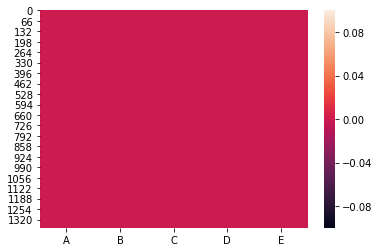

In [15]:
sns.heatmap(data.isnull())

In [17]:
data=pd.get_dummies(data)
data.head()

,A,B,C,D,E
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


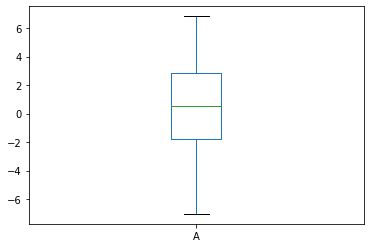

In [18]:
data["A"].plot.box()

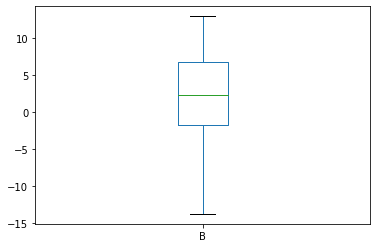

In [19]:
data["B"].plot.box()

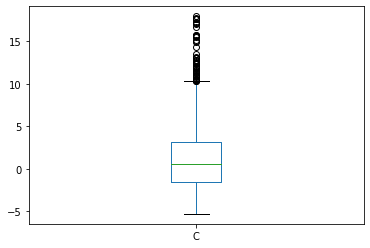

In [20]:
data["C"].plot.box()

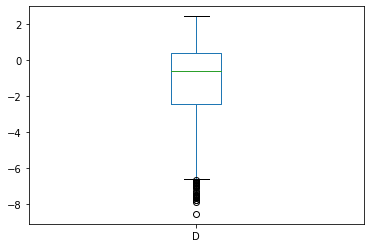

In [21]:
data["D"].plot.box()

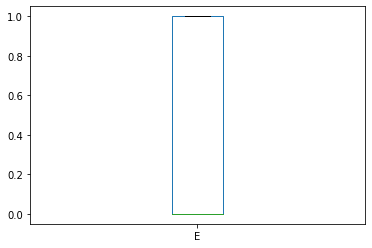

In [22]:
data["E"].plot.box()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data.astype(float))
data

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766, 0.        ],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563, 0.        ],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091, 0.        ],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518, 1.        ],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 , 1.        ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888, 1.        ]])

In [27]:
df=pd.DataFrame(data)
df.head()

,0,1,2,3,4
0,0.769004,0.839643,0.106783,0.736628,0.0
1,0.835659,0.820982,0.121804,0.644326,0.0
2,0.786629,0.416648,0.310608,0.786951,0.0
3,0.757105,0.871699,0.054921,0.450440,0.0
4,0.531578,0.348662,0.424662,0.687362,0.0


In [25]:
df.corr()

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [28]:
x=df.drop(4,axis=1)
x.head()

,0,1,2,3
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362


In [29]:
y=df[4]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 4, dtype: float64

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=21)

In [33]:
lg=LogisticRegression()

In [34]:
lg.fit(x_train,y_train)

C:\Users\max\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predlg=lg.predict(x_test)

In [36]:
print(accuracy_score(predlg,y_test))

0.9480968858131488


In [37]:
print(confusion_matrix(y_test,predlg))

[[155   6]
 [  9 119]]


In [38]:
print(classification_report(y_test,predlg))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       161
         1.0       0.95      0.93      0.94       128

    accuracy                           0.95       289
   macro avg       0.95      0.95      0.95       289
weighted avg       0.95      0.95      0.95       289



In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.6366782006920415
[[161   0]
 [105  23]]
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.75       161
         1.0       1.00      0.18      0.30       128

    accuracy                           0.64       289
   macro avg       0.80      0.59      0.53       289
weighted avg       0.78      0.64      0.56       289



In [41]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9653979238754326
[[151  10]
 [  0 128]]
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       161
         1.0       0.93      1.00      0.96       128

    accuracy                           0.97       289
   macro avg       0.96      0.97      0.97       289
weighted avg       0.97      0.97      0.97       289



C:\Users\max\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9757785467128027
[[156   5]
 [  2 126]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       161
         1.0       0.96      0.98      0.97       128

    accuracy                           0.98       289
   macro avg       0.97      0.98      0.98       289
weighted avg       0.98      0.98      0.98       289



In [43]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[161   0]
 [  0 128]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       161
         1.0       1.00      1.00      1.00       128

    accuracy                           1.00       289
   macro avg       1.00      1.00      1.00       289
weighted avg       1.00      1.00      1.00       289



In [44]:
#ROC CURVE
from sklearn.metrics import roc_curve

In [45]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.78180035, 0.83376143, 0.16898007, 0.91191086, 0.19426478,
       0.4535226 , 0.06608414, 0.23876103, 0.08186218, 0.01289506,
       0.925683  , 0.4169196 , 0.9263661 , 0.87189283, 0.1353303 ,
       0.18459756, 0.10320389, 0.09612392, 0.86805992, 0.08768426,
       0.70233992, 0.10991773, 0.17490424, 0.21943412, 0.17378309,
       0.91376648, 0.68001416, 0.04338311, 0.77480096, 0.80276201,
       0.05398138, 0.25703646, 0.55424445, 0.36835352, 0.90092412,
       0.01420894, 0.76431934, 0.93930597, 0.83744755, 0.11571719,
       0.19248306, 0.08286888, 0.1238299 , 0.02336192, 0.82332142,
       0.16097298, 0.89545398, 0.94564743, 0.71601179, 0.19197814,
       0.06491862, 0.26385398, 0.79115486, 0.51877942, 0.83512459,
       0.11956685, 0.03626074, 0.14213521, 0.64023789, 0.72216882,
       0.906691  , 0.02323923, 0.88679012, 0.52357781, 0.93535642,
       0.89276943, 0.22073468, 0.85190532, 0.59751356, 0.19280562,
       0.79733294, 0.892755  , 0.90578204, 0.17493019, 0.42663

In [46]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [47]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.01242236 0.02484472 0.02484472
 0.03726708 0.03726708 0.0621118  0.07453416 0.07453416 0.08074534
 0.08074534 0.08695652 0.08695652 0.0931677  0.0931677  0.11801242
 0.11801242 1.        ]
[0.        0.0078125 0.90625   0.90625   0.90625   0.9140625 0.9140625
 0.9296875 0.9296875 0.9296875 0.953125  0.953125  0.96875   0.96875
 0.9765625 0.9765625 0.984375  0.984375  1.        1.       ]
[1.95359832 0.95359832 0.55424445 0.55321223 0.53968784 0.53782733
 0.5235754  0.50566082 0.49584449 0.4535226  0.4169196  0.40481514
 0.37607901 0.36856756 0.36835352 0.36607132 0.35976522 0.33065068
 0.30333244 0.01289506]


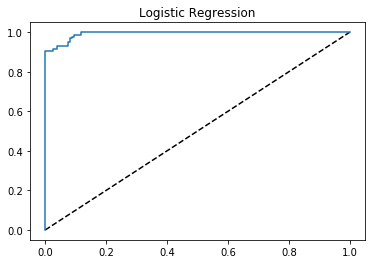

In [48]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="LogisticRegression")
plt.title("Logistic Regression")
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.9462102096273293


In [50]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(lg,"BANK_AUTHENTICATION.pkl")

C:\Users\max\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['BANK_AUTHENTICATION.pkl']